#### 서울시 공공자전거 따릉이 대여이력 분석 
###### 데이터 출처: 서울 열린 데이터 광장
http://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do

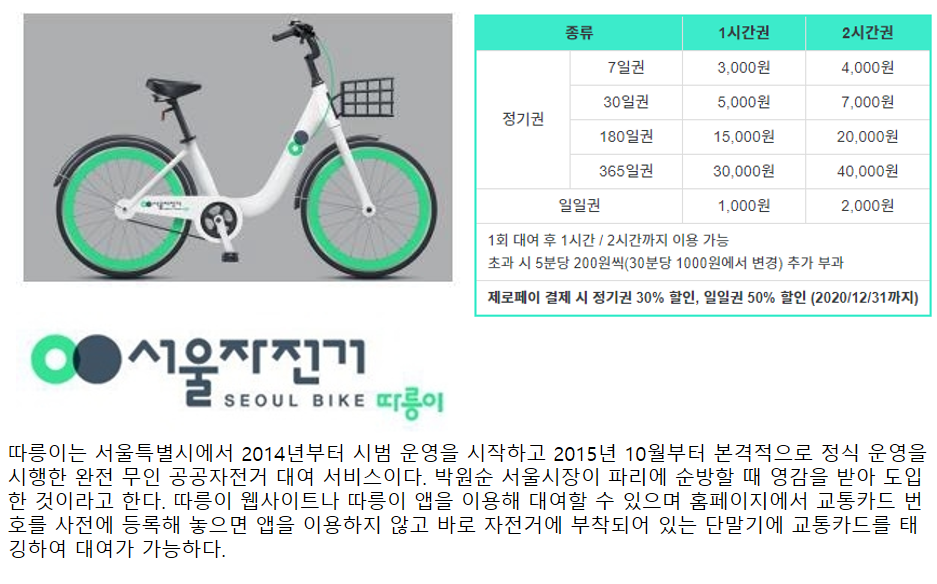

In [1]:
from IPython.display import Image
Image("img/seoul_bike.png")

In [2]:
## don't show warning message 
import warnings
warnings.filterwarnings("ignore")

In [3]:
## 필요한 패키지들 블러오기 & 그래픽 옵션 세팅 
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(style='darkgrid')

In [5]:
## 국내데이터 이므로 한글폰트 사용가능하도록 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['axes.unicode_minus'] = False

In [12]:
## 웹에서 일부 데이터를 다운받고, loading한다 (코딩포맷은 cp949)
df = pd.read_csv("data/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv", encoding = 'cp949')
df.shape

(586304, 11)

In [13]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


###### <span style="color:blue"> 데이터 및 컬럼명에 씌워져 있는 따옴표 제거 필요 </span>

In [15]:
## 특정 문자열, 기호, 공백등을 없애려면 str.strip()을 사용한다. 
df.columns = df.columns.str.strip("'")
df = df.apply(lambda x: x.str.strip("'") 
              if x.dtype == np.dtype('object') else x)

In [16]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100
2,SPB-09676,2018-06-16 00:00:11,1036,고덕동 주양쇼핑,7,2018-06-16 00:24:05,1038,강일 다솜 어린이 공원,9,23,3350
3,SPB-07143,2018-06-16 00:00:15,1726,삼익세라믹아파트교차로,7,2018-06-16 00:15:31,1706,기업은행 앞,9,14,1480
4,SPB-13007,2018-06-16 00:00:16,2058,노량진동 맥도널드앞,10,2018-06-16 00:14:25,258,신길역3번출구,8,13,2920


In [19]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [27]:
## Q1.자전거를 대여할 수 있는 대여소는 몇개나 되는가? 
df['대여대여소명'].unique().shape[0]

1267

In [29]:
## Q2.자전거를 반납할 수 있는 대여소는 몇개나 되는가? 
df['반납대여소명'].unique().shape[0]

1269

##### <span style="color:blue"> df[x].unique().shape[0 또는 1] : df[x]의 유니크한 갯수에 대해, 총 몇개의 row 또는 cloumn이 있는지 </span>

In [30]:
## Q3. 자전거 대여량이 많은 대여소는 어떤 곳들인가? 
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
Name: 대여대여소명, dtype: int64

In [31]:
## Q4. 자전거 반납이 많은 대여소는 어떤 곳들인가? 
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

In [32]:
## Q5. 이용거리 및 시간이 긴 대여소는 어떤 곳들인가? 
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909
1197,현대자동차서비스 앞,9364.282178
419,망원초록길 입구,9160.294118
1194,현대고등학교 건너편,9047.614350
1231,흑석역 1번출구,8938.909300
1113,청계천 생태교실 앞,8923.918819


In [33]:
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=False).head(10)

,대여대여소명,이용시간(분)
280,달맞이공원,59.782178
353,동작역 5번출구 동작주차공원,59.484000
93,개화동상사마을종점 버스정류장,55.500000
649,서울숲 남문 버스정류소 옆,55.495074
648,서울숲 관리사무소,55.492228
1231,흑석역 1번출구,53.950631
1194,현대고등학교 건너편,53.633184
1172,한신16차아파트 119동 앞,53.196926
419,망원초록길 입구,52.245098
118,"고속터미널역 8-1번, 8-2번 출구 사이",51.832858


In [34]:
## Q6. 반대로 이용거리 및 시간이 짧은 대여소는 어떤 곳들인가? 
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=True).head(10)

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294
584,상림마을 생태공원,2405.736041
700,성북제일새마을금고 본점 앞,2416.977778
40,SK telecom(수유직영점) 앞,2496.626506
939,원묵고등학교,2563.861111
641,서울보증보험본사 앞,2588.011928


In [35]:
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=True).head(10)

,대여대여소명,이용시간(분)
7,CJ오쇼핑앞,11.416667
1249,상암센터 정비실,12.000000
188,국군복지단,12.022901
1089,참새공원(백곡경노당),12.666667
575,삼일초등학교 인근,14.460274
656,서울시립대 앞,14.618026
1265,청계산입구역 1번출구,15.210332
331,독산역 1번출구 앞 자전거보관소,15.482249
267,녹번역 4번출구,15.557500
1028,정동사거리,15.994643


#####  <span style="color:blue"> sort_value()를 사용하기 위해서는 먼저 reset_index()를 해줘야 함</span>

In [37]:
## Q7. 이용거리 및 시간의 최대&최소는? 
print(df['이용시간(분)'].max()) 
print(df['이용시간(분)'].min())
print(df['이용거리(M)'].max()) 
print(df['이용거리(M)'].min())

4320
2
255070
0


In [39]:
## 시계열 분석을 위해 일자 데이터의 타입 변경 
df.head(1)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160


In [40]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
자전거번호      586304 non-null object
대여일시       586304 non-null datetime64[ns]
대여대여소번호    586304 non-null object
대여대여소명     586304 non-null object
대여거치대      586304 non-null int64
반납일시       586304 non-null datetime64[ns]
반납대여소번호    586304 non-null object
반납대여소명     586304 non-null object
반납거치대      586304 non-null int64
이용시간(분)    586304 non-null int64
이용거리(M)    586304 non-null int64
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 49.2+ MB


In [45]:
## 분석의 편의를 위해 연/월/일/시/분/초 형태로 분해 
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek

df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek

df.head(1)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여일,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,...,16,0,0,5,2018,6,16,0,16,5


In [54]:
## Q. 기간내 일자별, 요일별, 시간대별 자전거 대여량 추이를 알고싶다. 
#### 먼저 월과 일을 합쳐라 (연도는 동일하게 2018년 이므로 불필요함)
def concatenate_mm_dd(대여일시) : 
    return '{0}-{1}'.format(대여일시.month, 대여일시.day)

df['대여일자'] = df['대여일시'].apply(concatenate_mm_dd)
df.head(1)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,count,대여일자
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,...,0,5,2018,6,16,0,16,5,1,6-16


In [58]:
#### 일자별 자전거 대여대수를 생성하라 
df_byday = df['대여일자'].value_counts().reset_index()
df_byday.columns = ['대여일자', 'count']
df_byday.head()

,대여일자,count
0,6-21,47319
1,6-22,47024
2,6-19,46839
3,6-20,46107
4,6-25,46105


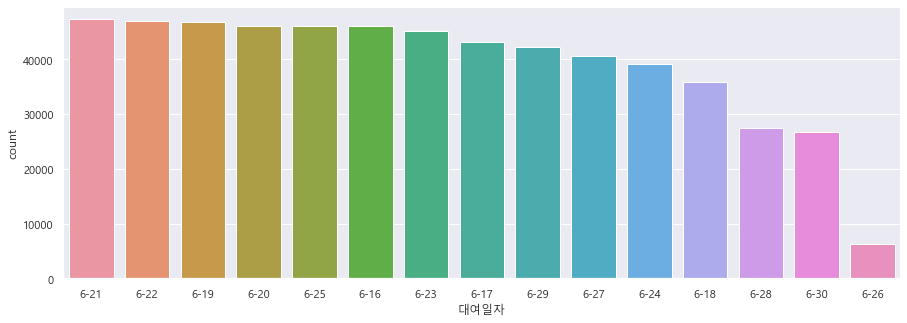

In [66]:
plt.figure(figsize=(15, 5)) 
sns.barplot(data=df_byday, x='대여일자', y='count')

In [68]:
#### 요일별 자전거 대여대수를 생성하라 
df_bydow = df['대여요일'].value_counts().reset_index()
df_bydow.columns = ['대여요일', 'count']
df_bydow.head()

,대여요일,count
0,5,117981
1,4,89337
2,2,86805
3,6,82325
4,0,81933


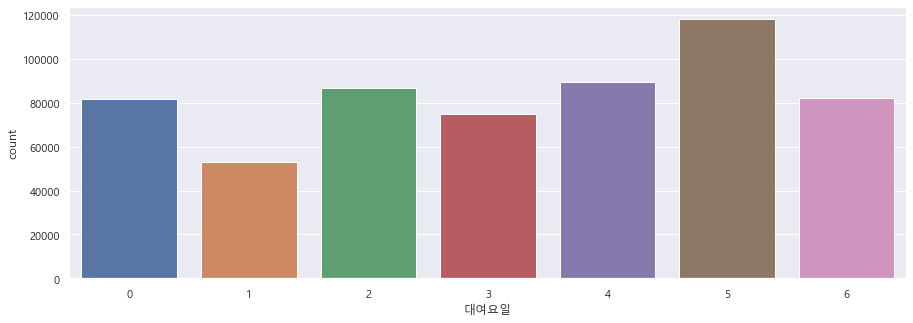

In [69]:
plt.figure(figsize=(15, 5)) 
sns.barplot(data=df_bydow, x='대여요일', y='count')

In [75]:
#### 시간대별 자전거 대여 및 반납 대수를 생성하라 
df_byhr = df['대여시'].value_counts().reset_index()
df_byhr.columns = ['대여시', 'count']

df_byhr2 = df['반납시'].value_counts().reset_index()
df_byhr2.columns = ['반납시', 'count']

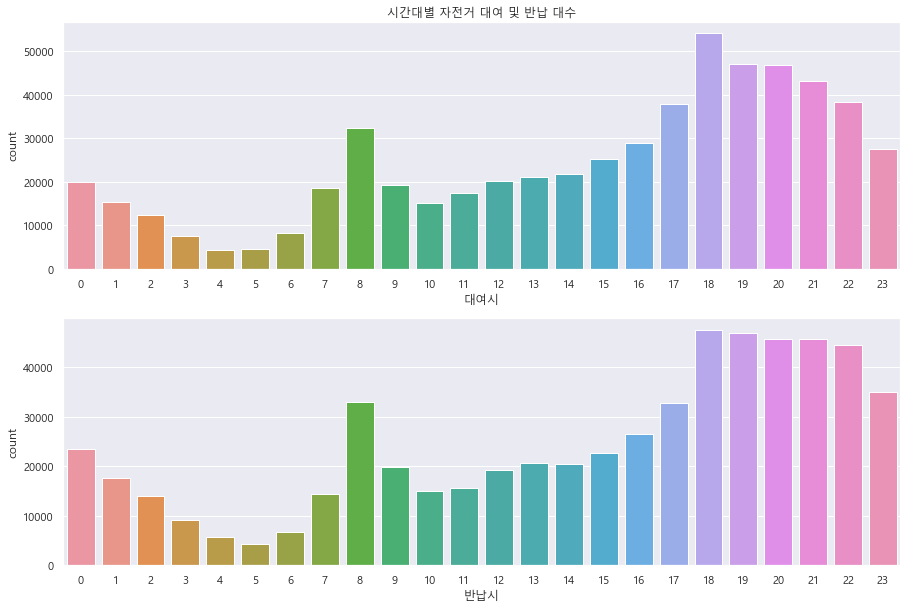

In [78]:
#### 시간대별 자전거 대여 및 반납 대수 비교 
figure,(ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(15,10)

sns.barplot(data=df_byhr, x='대여시', y='count', ax=ax1)
ax1.set(title= '시간대별 자전거 대여 및 반납 대수')
sns.barplot(data=df_byhr2, x='반납시', y='count', ax=ax2)

In [79]:
## Q. 자전거 대여와 반납은 주로 같은 곳에서 이뤄지는가? 
#### 대여와 반납 장소가 동일한지 여부 --> '같은대여반납소'컬럼 생성 
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']
df['같은대여반납소'].head()

0    False
1    False
2    False
3    False
4    False
Name: 같은대여반납소, dtype: bool

   같은대여반납소   count
0    False  520100
1     True   66204


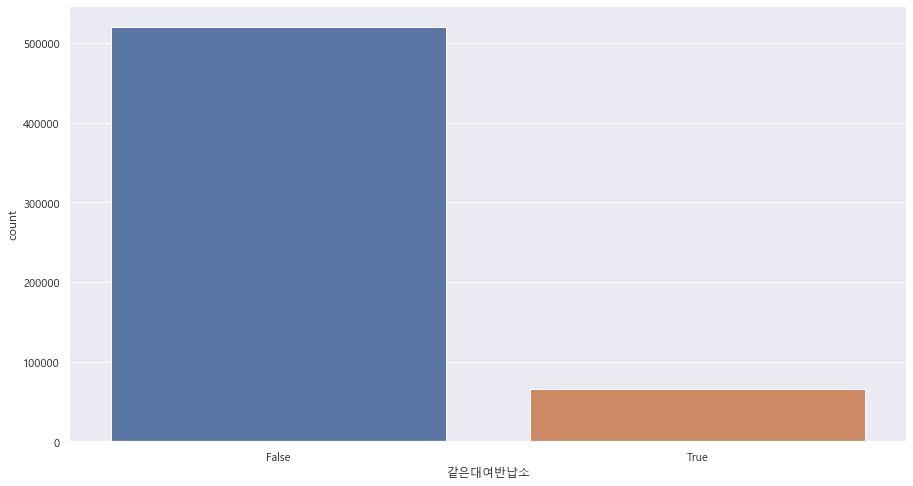

In [86]:
df_same = df['같은대여반납소'].value_counts().reset_index()
df_same.columns = ['같은대여반납소', 'count']

print(df_same) 
sns.barplot(data=df_same, x='같은대여반납소', y='count')

In [89]:
## Q. 가장 많이 대여된 자전거는 어느 대여소의 자전거이며, 몇번이나 대여되었나? 
df.describe(include='all')

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,count,대여일자,같은대여반납소
count,586304,586304,586304,586304,586304.000000,586304,586304,586304,586304.000000,586304.000000,...,586304.000000,586304.0,586304.000000,586304.000000,586304.000000,586304.000000,586304.000000,586304.0,586304,586304
unique,12970,426750,1267,1267,NaN,427833,1269,1269,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2
top,SPB-18238,2018-06-18 19:42:44,207,여의나루역 1번출구 앞,NaN,2018-06-19 19:53:32,113,홍대입구역 2번출구 앞,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-21,False
freq,139,42,4073,4073,NaN,18,3896,3896,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47319,520100
first,NaN,2018-06-16 00:00:07,NaN,NaN,NaN,2018-06-16 00:04:15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-30 23:59:58,NaN,NaN,NaN,2018-07-03 16:47:17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.981460,NaN,NaN,NaN,6.939248,28.922530,...,3.227472,2018.0,6.000921,22.419371,14.544931,29.999012,3.226064,1.0,NaN,NaN
std,NaN,NaN,NaN,NaN,5.217671,NaN,NaN,NaN,5.196975,30.866556,...,1.984351,0.0,0.030334,4.247077,6.745248,17.327109,1.988445,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,2.000000,...,0.000000,2018.0,6.000000,1.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,3.000000,9.000000,...,2.000000,2018.0,6.000000,19.000000,9.000000,15.000000,2.000000,1.0,NaN,NaN


#### 총 12970대의 자전거가 운행되었으며, 이용횟수는 약 58.6만회에 달한다. 

In [98]:
df_rent = df['자전거번호'].value_counts().reset_index()
df_rent.columns = ['자전거번호', 'count']

df_rent.describe(include='all')

,자전거번호,count
count,12970,12970.000000
unique,12970,NaN
top,SPB-15778,NaN
freq,1,NaN
mean,NaN,45.204626
std,NaN,20.515759
min,NaN,1.000000
25%,NaN,31.000000
50%,NaN,45.000000
75%,NaN,59.000000


##### 자전거 1대당 평균 45.2회 운행되었으며, 여의나루1번출구역의 SPB-15778이 총 139회로 가장많이 대여되었다. 

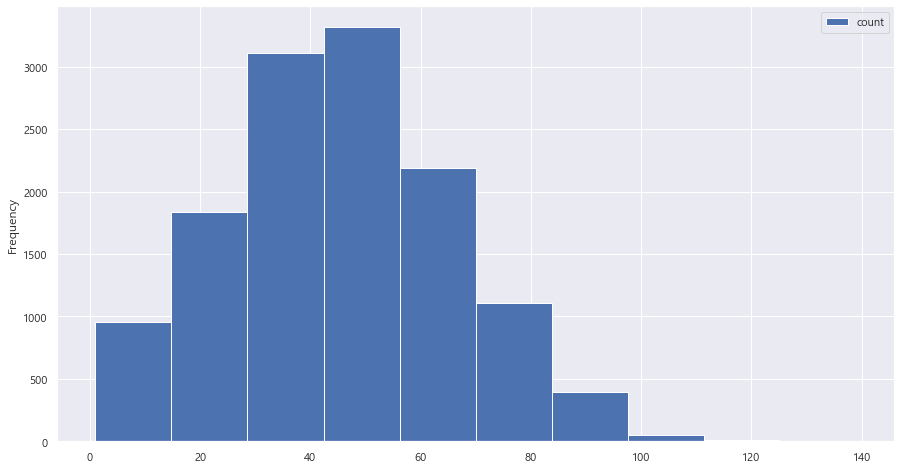

In [93]:
df_rent.plot.hist()

((array([-3.87441343, -3.65275913, -3.53122787, ...,  3.53122787,
          3.65275913,  3.87441343]),
  array([  1,   1,   1, ..., 126, 128, 139], dtype=int64)),
 (20.471497338411087, 45.20462606013877, 0.9975987878736101))

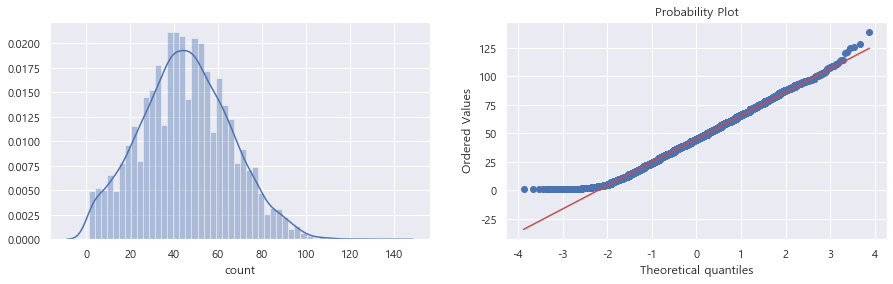

In [99]:
from scipy import stats 
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.distplot(df_rent['count'], ax=ax1)
stats.probplot(df_rent['count'], plot=ax2)